In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
from deficit_defs import *

Splikes version  0.1.4
Plasticnet version  0.1.12
macOS-14.4.1-arm64-arm-64bit
Base Image File: asdf/bbsk081604_all_log2dog.asdf


In [ ]:
from include_2021_10_21 import *

Version 0.0.6


In [ ]:
weak_i=0
strong_i=1

In [ ]:
number_of_neurons=20
S=Storage()
closed_eye_noise_mat=linspace(0,1,21)

for n,noise in tqdm(enumerate(closed_eye_noise_mat),total=len(closed_eye_noise_mat)):
    sfname=f'sims-2021-11-19/continuous patch {number_of_neurons} neurons noise {noise:.1f}.asdf'

    R=Results(sfname)

    
    idx1,idx2=[_[1] for _ in R.sequence_index]
    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  
    
    S+=noise,recovery_rate_μ,recovery_rate_σ    
    
    
noise,recovery_rate_μ,recovery_rate_σ=S.arrays()

  0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
patch_result=noise,recovery_rate_μ,recovery_rate_σ

In [ ]:
savevars('sims-2021-11-19/patch_results.asdf','patch_result')

Saving sims-2021-11-19/patch_results.asdf...done.


In [ ]:
atropine_blur_mat=linspace(0,6,21)
closed_eye_noise_mat=linspace(0,1,11)

S=Storage()

count=0
    
for n,noise in tqdm(enumerate(closed_eye_noise_mat),total=len(closed_eye_noise_mat)):
    for b,blur in enumerate(atropine_blur_mat):
        sfname=f'sims-2021-11-19/continuous atropine {number_of_neurons} neurons noise {noise:.1f} blur {blur:0.1f}.asdf'

        R=Results(sfname)


        idx1,idx2=[_[1] for _ in R.sequence_index]
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

        S+=noise,blur,recovery_rate_μ,recovery_rate_σ    

        count+=1

    
noise,blur,recovery_rate_μ,recovery_rate_σ=S.arrays()        


  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
noise_N=len(closed_eye_noise_mat)
blur_N=len(atropine_blur_mat)

noise=noise.reshape(noise_N,blur_N)
noise,blur,recovery_rate_μ,recovery_rate_σ=[_.reshape(noise_N,blur_N) for _ in (noise,blur,recovery_rate_μ,recovery_rate_σ)]

atropine_result=noise,blur,recovery_rate_μ,recovery_rate_σ

In [ ]:
savevars('sims-2021-11-19/atropine_results.asdf','atropine_result')

Saving sims-2021-11-19/atropine_results.asdf...done.


In [ ]:
blur.shape

(11, 21)

<matplotlib.legend.Legend>

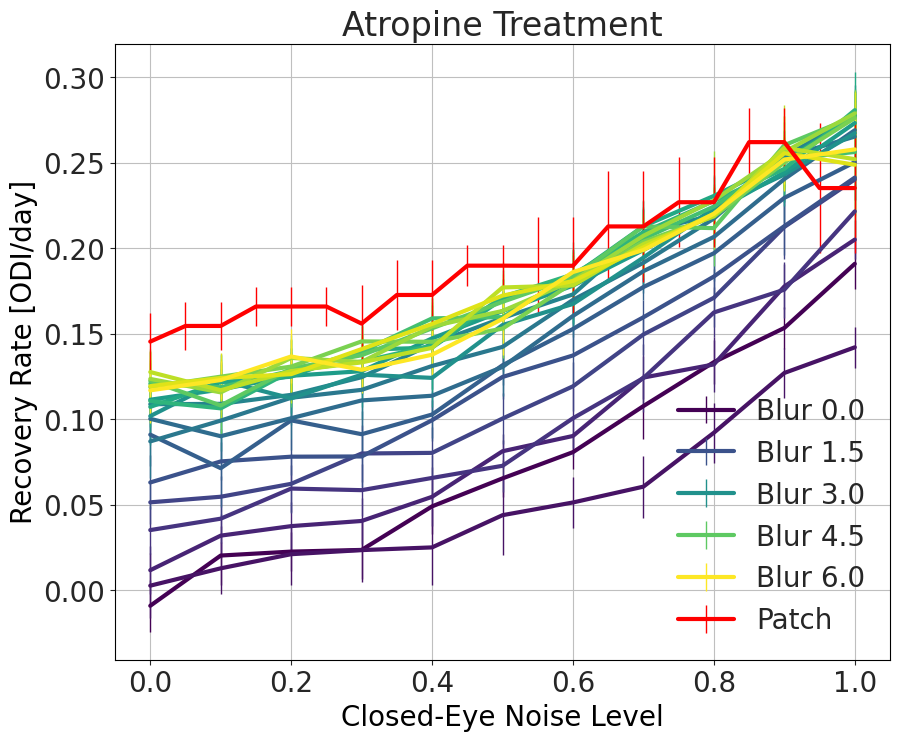

In [ ]:
import cycler

n = 21
color = cm.viridis(np.linspace(0, 1,n))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)



noise,blur,recovery_rate_μ,recovery_rate_σ=atropine_result

for b in range(blur_N):
    
    if blur[0,b] in [0,1.5,3,4.5,6]:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 label=f'Blur {blur[0,b]}',color=color[b]) # positive = recovery
    else:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 color=color[b]) # positive = recovery
        
        
noise,recovery_rate_μ,recovery_rate_σ=patch_result        
errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,color='r',label='Patch') # positive = recovery
        
        
ylabel('Recovery Rate [ODI/day]')
xlabel('Closed-Eye Noise Level')
title('Atropine Treatment')
    
legend()

In [ ]:
blur_N

21

In [ ]:
contrast_mat=linspace(0,1,11)

In [ ]:

number_of_neurons=20
S=Storage()

for c,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):
    sfname=f'sims-2021-11-19/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f}.asdf'

    R=Results(sfname)

    idx1,idx2=[_[1] for _ in R.sequence_index]
    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  
    
    S+=contrast,recovery_rate_μ,recovery_rate_σ    
    
    
contrast,recovery_rate_μ,recovery_rate_σ=S.arrays()

contrast_result=contrast,recovery_rate_μ,recovery_rate_σ

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
savevars('sims-2021-11-19/contrast_results.asdf','contrast_result')

Saving sims-2021-11-19/contrast_results.asdf...done.


In [ ]:
f_mat=array([10,30,50,70,90])
n = 5
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

S=Storage()
for fi,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    for c,contrast in enumerate(contrast_mat):
        sfname=f'sims-2021-11-19/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f} mask f {f}.asdf'


        R=Results(sfname)


        idx1,idx2=[_[1] for _ in R.sequence_index]
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

        S+=f,contrast,recovery_rate_μ,recovery_rate_σ    

        count+=1

    
    
f,contrast,recovery_rate_μ,recovery_rate_σ=S.arrays()        


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
f_N=len(f_mat)
contrast_N=len(contrast_mat)


f,contrast,recovery_rate_μ,recovery_rate_σ=[_.reshape(f_N,contrast_N) for _ in (f,contrast,recovery_rate_μ,recovery_rate_σ)]
mask_result=f,contrast,recovery_rate_μ,recovery_rate_σ
savevars('sims-2021-11-19/mask_results.asdf','mask_result')

Saving sims-2021-11-19/mask_results.asdf...done.


In [ ]:
noise_mat=linspace(0,1,11)
number_of_neurons=20
S=Storage()

for n,noise in tqdm(enumerate(noise_mat),total=len(noise_mat)):
    sfname=f'sims-2021-11-19/continuous fix {number_of_neurons} neurons noise {noise:.1f}.asdf'    
    R=Results(sfname)
    idx1,idx2=[_[1] for _ in R.sequence_index]
    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  
    
    S+=noise,recovery_rate_μ,recovery_rate_σ
    
noise,recovery_rate_μ,recovery_rate_σ=S.arrays()    


glasses_result=noise,recovery_rate_μ,recovery_rate_σ
savevars('sims-2021-11-19/glasses_results.asdf','glasses_result')

  0%|          | 0/11 [00:00<?, ?it/s]

Saving sims-2021-11-19/glasses_results.asdf...done.
